In [ ]:
# import gdown

# url = 'https://drive.google.com/file/d/1Dh3ejE9GNg8jMBSaAF6Vx7q_79fGaBDZ/view?usp=sharing'
# output = '/content/final_cited_by_years_type_cat.csv'
# gdown.download(url=url, output=output, quiet=False, fuzzy=True)
import gdown

url = 'https://drive.google.com/file/d/1UneExPO0cTGpaTv4QiKDrn7zKHxrCzND/view?usp=sharing'
output = 'final_df.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1UneExPO0cTGpaTv4QiKDrn7zKHxrCzND
To: /content/final_df.csv
100%|██████████| 414M/414M [00:09<00:00, 41.5MB/s]


'final_df.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('final_df.csv')

In [ ]:
df

,Unnamed: 0,article_id_openalex,date_citation_counts,first_publication_date,journal_publication_date,article_type,categories
0,1,https://openalex.org/W100014870,"{'1996-02-21': 1, '1997-01-11': 1, '1997-01-14...",1996-04-01,1996-07-01,journal-article,q-alg math.QA
1,2,https://openalex.org/W1000585164,"{'2015-10-22': 1, '2016-09-28': 1, '2016-10-21...",2015-07-24,2016-02-16,journal-article,hep-ph
2,3,https://openalex.org/W1000603767,"{'2011-06-11': 1, '2013-05-08': 1, '2013-10-24...",2012-09-24,2013-02-13,journal-article,quant-ph
3,4,https://openalex.org/W1000951278,"{'2012-10-25': 1, '2013-11-08': 1}",2012-03-20,2012-03-20,journal-article,stat.ME
4,5,https://openalex.org/W1001077819,"{'2015-11-11': 1, '2016-03-05': 1, '2016-03-16...",2015-07-30,2015-12-07,journal-article,cond-mat.mes-hall quant-ph
...,...,...,...,...,...,...,...
842077,895922,https://openalex.org/W997665189,{'2016-03-17': 1},2015-07-17,2016-05-20,journal-article,hep-ph astro-ph.HE
842078,895923,https://openalex.org/W998121512,"{'2015-05-29': 1, '2015-09-11': 1, '2016-04-04...",2015-07-23,2015-07-23,journal-article,astro-ph.SR astro-ph.EP
842079,895924,https://openalex.org/W99824525,"{'2004-10-12': 1, '2004-12-25': 1, '2006-07-25...",2003-09-15,2004-06-22,journal-article,cond-mat.str-el
842080,895925,https://openalex.org/W998383075,"{'2015-05-28': 1, '2016-02-08': 1, '2017-04-12...",2013-11-28,2015-07-09,journal-article,astro-ph.HE astro-ph.CO


In [ ]:
df['categories'].value_counts()

astro-ph                                                                  59521
hep-ph                                                                    47635
hep-th                                                                    39112
quant-ph                                                                  30520
cond-mat.mes-hall                                                         21956
                                                                          ...  
math.GR math.CO math.OA math.QA math.RT                                       1
quant-ph cond-mat.other math-ph math.MP physics.atom-ph physics.optics        1
cs.MA cs.CY cs.SE cs.SI                                                       1
cond-mat.stat-mech nlin.PS physics.soc-ph                                     1
math.AT math.CT math.RT                                                       1
Name: categories, Length: 32246, dtype: int64

#Evaluations

First, lets loc on the papers which are journals (there are few papers which left after the preprocess which are not journal and we left them in order to be able to evaluate other type of paper if it will be nessecary in the future).

In [ ]:
df = df[df['article_type'] == 'journal-article']

**First, convert the string dict to python dict, and the different dates to datetime objects**

In [ ]:
df_copy = df.copy()
# df_copy = df_copy[df_copy['journal_publication_date'] >= df_copy['first_publication_date']]
df_copy

,Unnamed: 0,article_id_openalex,date_citation_counts,first_publication_date,journal_publication_date,article_type,categories
0,1,https://openalex.org/W100014870,"{'1996-02-21': 1, '1997-01-11': 1, '1997-01-14...",1996-04-01,1996-07-01,journal-article,q-alg math.QA
1,2,https://openalex.org/W1000585164,"{'2015-10-22': 1, '2016-09-28': 1, '2016-10-21...",2015-07-24,2016-02-16,journal-article,hep-ph
2,3,https://openalex.org/W1000603767,"{'2011-06-11': 1, '2013-05-08': 1, '2013-10-24...",2012-09-24,2013-02-13,journal-article,quant-ph
3,4,https://openalex.org/W1000951278,"{'2012-10-25': 1, '2013-11-08': 1}",2012-03-20,2012-03-20,journal-article,stat.ME
4,5,https://openalex.org/W1001077819,"{'2015-11-11': 1, '2016-03-05': 1, '2016-03-16...",2015-07-30,2015-12-07,journal-article,cond-mat.mes-hall quant-ph
...,...,...,...,...,...,...,...
842077,895922,https://openalex.org/W997665189,{'2016-03-17': 1},2015-07-17,2016-05-20,journal-article,hep-ph astro-ph.HE
842078,895923,https://openalex.org/W998121512,"{'2015-05-29': 1, '2015-09-11': 1, '2016-04-04...",2015-07-23,2015-07-23,journal-article,astro-ph.SR astro-ph.EP
842079,895924,https://openalex.org/W99824525,"{'2004-10-12': 1, '2004-12-25': 1, '2006-07-25...",2003-09-15,2004-06-22,journal-article,cond-mat.str-el
842080,895925,https://openalex.org/W998383075,"{'2015-05-28': 1, '2016-02-08': 1, '2017-04-12...",2013-11-28,2015-07-09,journal-article,astro-ph.HE astro-ph.CO


In [ ]:
# df_copy = df_copy.iloc[0:100000]

In [ ]:
type(df_copy['date_citation_counts'])

pandas.core.series.Series

In [ ]:
df_copy['date_citation_counts']

0         {'1996-02-21': 1, '1997-01-11': 1, '1997-01-14...
1         {'2015-10-22': 1, '2016-09-28': 1, '2016-10-21...
2         {'2011-06-11': 1, '2013-05-08': 1, '2013-10-24...
3                        {'2012-10-25': 1, '2013-11-08': 1}
4         {'2015-11-11': 1, '2016-03-05': 1, '2016-03-16...
                                ...                        
842077                                    {'2016-03-17': 1}
842078    {'2015-05-29': 1, '2015-09-11': 1, '2016-04-04...
842079    {'2004-10-12': 1, '2004-12-25': 1, '2006-07-25...
842080    {'2015-05-28': 1, '2016-02-08': 1, '2017-04-12...
842081    {'1998-06-24': 1, '1999-03-31': 1, '1999-08-12...
Name: date_citation_counts, Length: 818012, dtype: object

In [ ]:
import ast
from tqdm import tqdm
tqdm.pandas()

# Conversion of string representation of dictionary to dictionary
df_copy['date_citation_counts'] = df_copy['date_citation_counts'].progress_apply(ast.literal_eval)

# Conversion of string to datetime
df_copy['first_publication_date'] = pd.to_datetime(df_copy['first_publication_date'])
df_copy['journal_publication_date'] = pd.to_datetime(df_copy['journal_publication_date'])

100%|██████████| 818012/818012 [02:05<00:00, 6538.64it/s] 


**Then, lets compare the average and median number of citations before journal publication date Vs. after the jornal publication date (overall, no regards to the category, for all the years)**

In [ ]:
# df_copy.to_parquet()

##First Scenario - Pre and Post-Journal Publication Citation Rates

100%|██████████| 818012/818012 [09:47<00:00, 1393.01it/s]


<Figure size 1000x600 with 0 Axes>

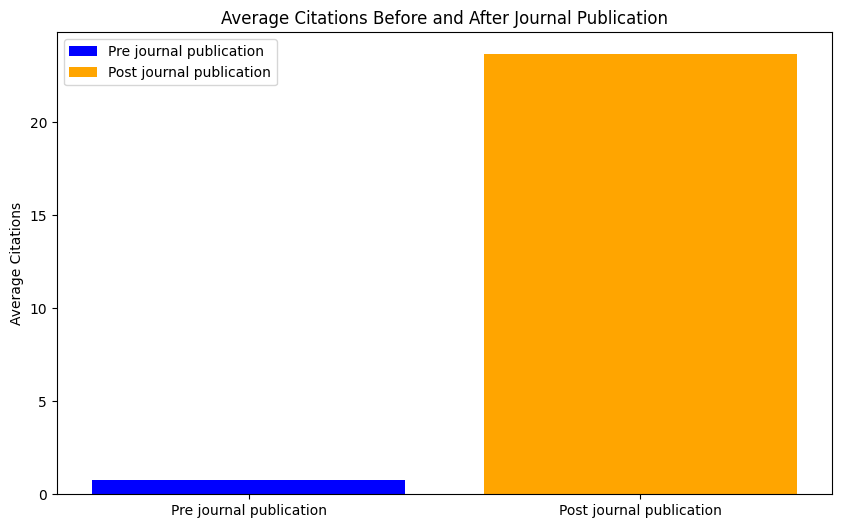

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import ast
import numpy as np
from tqdm import tqdm
tqdm.pandas()

# # Conversion of string representation of dictionary to dictionary
# df_copy['date_citation_counts'] = df_copy['date_citation_counts'].apply(ast.literal_eval)

# # Conversion of string to datetime
# df_copy['first_publication_date'] = pd.to_datetime(df_copy['first_publication_date'])
# df_copy['journal_publication_date'] = pd.to_datetime(df_copy['journal_publication_date'])

# Function to compute average citations before and after journal publication
def compute_avg_citations(row):
    date_citations = {datetime.strptime(date, "%Y-%m-%d"): count for date, count in row['date_citation_counts'].items()}
    pre_journal_citations = [count for date, count in date_citations.items() if date <= row['journal_publication_date']]
    post_journal_citations = [count for date, count in date_citations.items() if date > row['journal_publication_date']]

    sum_pre_journal_citation = sum(pre_journal_citations) #/ len(pre_journal_citations) if pre_journal_citations else 0
    sum_post_journal_citation = sum(post_journal_citations) #/ len(post_journal_citations) if post_journal_citations else 0

    return pd.Series([sum_pre_journal_citation, sum_post_journal_citation])

# Apply the function to the DataFrame
df_copy[['sum_pre_journal_citation', 'sum_post_journal_citation']] = df_copy.progress_apply(compute_avg_citations, axis=1)

# Compute overall averages
overall_avg_pre_journal_citation = np.mean(df_copy['sum_pre_journal_citation'])
overall_avg_post_journal_citation = np.mean(df_copy['sum_post_journal_citation'])

# Now let's plot it
plt.figure(figsize=(10, 6))

# Now let's plot it
plt.figure(figsize=(10, 6))

# Plot each bar individually, assign different colors and labels for the legend
plt.bar('Pre journal publication', overall_avg_pre_journal_citation, color='blue', label='Pre journal publication')
plt.bar('Post journal publication', overall_avg_post_journal_citation, color='orange', label='Post journal publication')

plt.title('Average Citations Before and After Journal Publication')
plt.ylabel('Average Citations')

# Add a legend
plt.legend()

plt.show()


In [ ]:
print(f"overall_avg_pre_journal_citation: {overall_avg_pre_journal_citation}")
print(f"overall_avg_post_journal_citation: {overall_avg_post_journal_citation}")

overall_avg_pre_journal_citation: 0.7731818115137675
overall_avg_post_journal_citation: 23.65965658205503


**Now the mean can be less informative if we have too many outlayers so we will also plot the median**

<Figure size 1000x600 with 0 Axes>

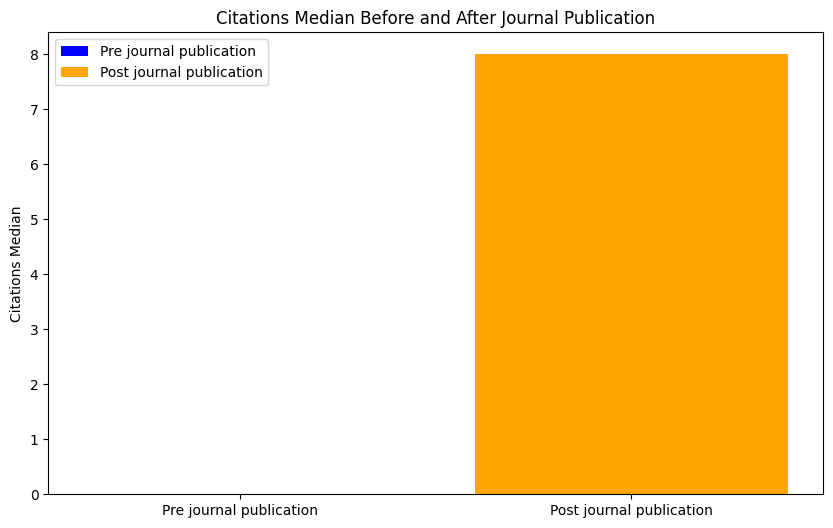

In [ ]:
# Compute overall averages
overall_median_pre_journal_citation = np.median(df_copy['sum_pre_journal_citation'])
overall_median_post_journal_citation = np.median(df_copy['sum_post_journal_citation'])

# Now let's plot it
plt.figure(figsize=(10, 6))

# Now let's plot it
plt.figure(figsize=(10, 6))

# Plot each bar individually, assign different colors and labels for the legend
plt.bar('Pre journal publication', overall_median_pre_journal_citation, color='blue', label='Pre journal publication')
plt.bar('Post journal publication', overall_median_post_journal_citation, color='orange', label='Post journal publication')

plt.title('Citations Median Before and After Journal Publication')
plt.ylabel('Citations Median')

# Add a legend
plt.legend()

In [ ]:
print(f"overall_median_pre_journal_citation: {overall_median_pre_journal_citation}")
print(f"overall_median_post_journal_citation: {overall_median_post_journal_citation}")

overall_median_pre_journal_citation: 0.0
overall_median_post_journal_citation: 8.0


**Next, we will do the same according to categories (top 5 informative categories).**

In [ ]:
df['categories'].value_counts()

astro-ph                                                                 57630
hep-ph                                                                   46433
hep-th                                                                   38569
quant-ph                                                                 29956
cond-mat.mes-hall                                                        21782
                                                                         ...  
cs.SD cs.SY stat.ML                                                          1
math.NA cond-mat.quant-gas math-ph math.MP quant-ph                          1
math.PR physics.bio-ph q-bio.PE                                              1
astro-ph.IM astro-ph.HE astro-ph.SR physics.plasm-ph physics.space-ph        1
math.AT math.CT math.RT                                                      1
Name: categories, Length: 30896, dtype: int64

In [ ]:
top_5_categories = df['categories'].value_counts().nlargest(5)
top_5_categories

astro-ph             57630
hep-ph               46433
hep-th               38569
quant-ph             29956
cond-mat.mes-hall    21782
Name: categories, dtype: int64

In [ ]:
df_copy

,Unnamed: 0,article_id_openalex,date_citation_counts,first_publication_date,journal_publication_date,article_type,categories,sum_pre_journal_citation,sum_post_journal_citation
0,1,https://openalex.org/W100014870,"{'1996-02-21': 1, '1997-01-11': 1, '1997-01-14...",1996-04-01,1996-07-01,journal-article,q-alg math.QA,1,14
1,2,https://openalex.org/W1000585164,"{'2015-10-22': 1, '2016-09-28': 1, '2016-10-21...",2015-07-24,2016-02-16,journal-article,hep-ph,1,7
2,3,https://openalex.org/W1000603767,"{'2011-06-11': 1, '2013-05-08': 1, '2013-10-24...",2012-09-24,2013-02-13,journal-article,quant-ph,1,8
3,4,https://openalex.org/W1000951278,"{'2012-10-25': 1, '2013-11-08': 1}",2012-03-20,2012-03-20,journal-article,stat.ME,0,2
4,5,https://openalex.org/W1001077819,"{'2015-11-11': 1, '2016-03-05': 1, '2016-03-16...",2015-07-30,2015-12-07,journal-article,cond-mat.mes-hall quant-ph,1,9
...,...,...,...,...,...,...,...,...,...
842077,895922,https://openalex.org/W997665189,{'2016-03-17': 1},2015-07-17,2016-05-20,journal-article,hep-ph astro-ph.HE,1,0
842078,895923,https://openalex.org/W998121512,"{'2015-05-29': 1, '2015-09-11': 1, '2016-04-04...",2015-07-23,2015-07-23,journal-article,astro-ph.SR astro-ph.EP,1,12
842079,895924,https://openalex.org/W99824525,"{'2004-10-12': 1, '2004-12-25': 1, '2006-07-25...",2003-09-15,2004-06-22,journal-article,cond-mat.str-el,0,4
842080,895925,https://openalex.org/W998383075,"{'2015-05-28': 1, '2016-02-08': 1, '2017-04-12...",2013-11-28,2015-07-09,journal-article,astro-ph.HE astro-ph.CO,1,3


**for average results**

overall_avg_pre_journal_citation: 0.7681068887732084
overall_avg_post_journal_citation: 57.96775984730175


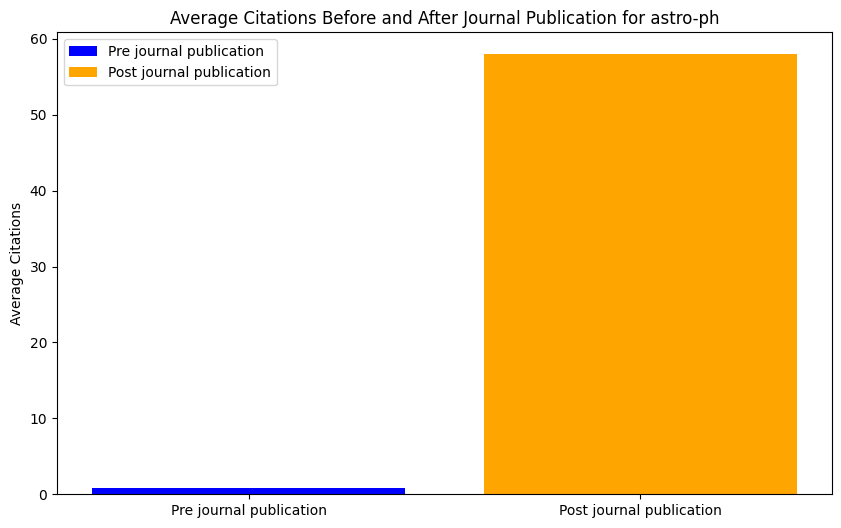

overall_avg_pre_journal_citation: 0.8115995089699136
overall_avg_post_journal_citation: 26.903516895311522


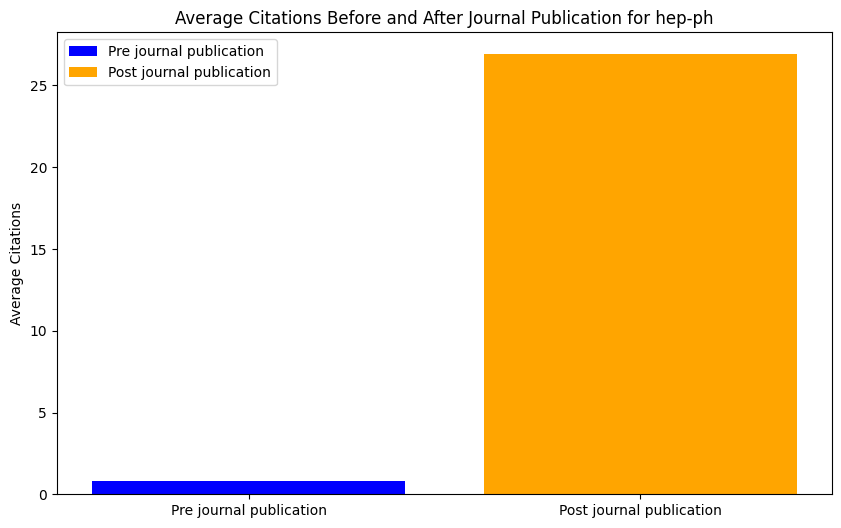

overall_avg_pre_journal_citation: 0.9225543830537478
overall_avg_post_journal_citation: 23.365371152998524


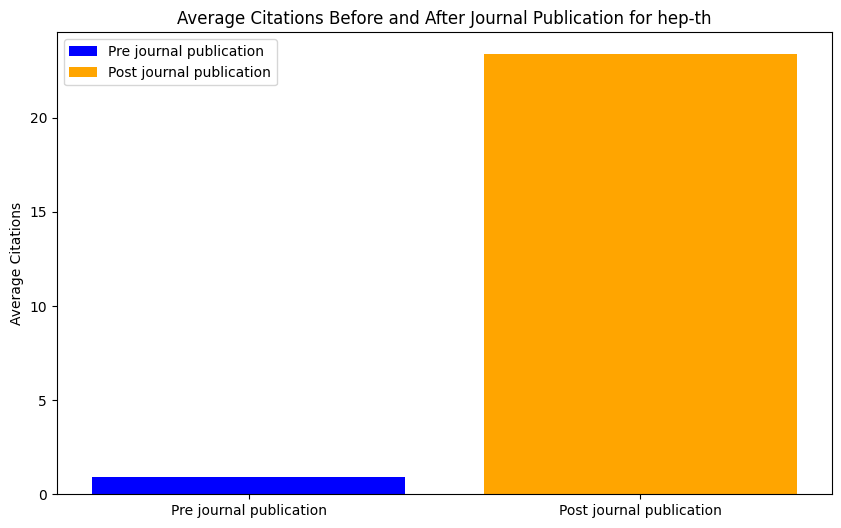

overall_avg_pre_journal_citation: 0.8502470289758313
overall_avg_post_journal_citation: 20.27600480705034


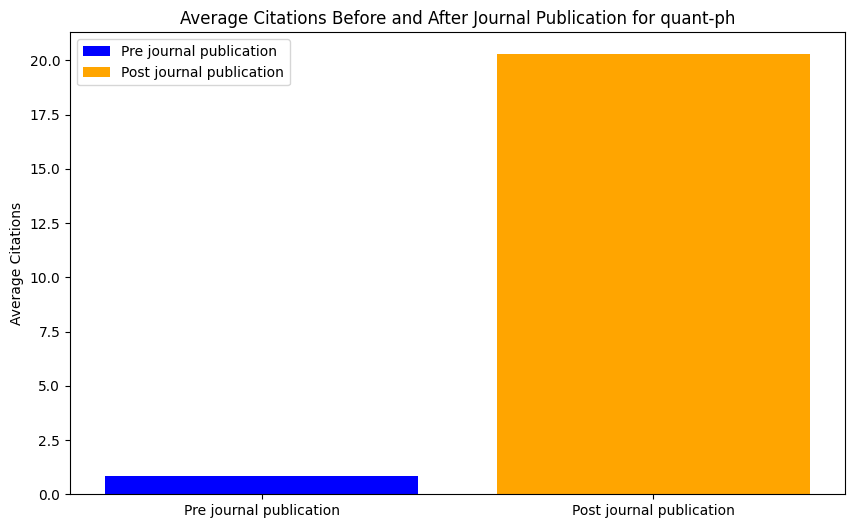

overall_avg_pre_journal_citation: 0.6838674134606556
overall_avg_post_journal_citation: 21.743366082086126


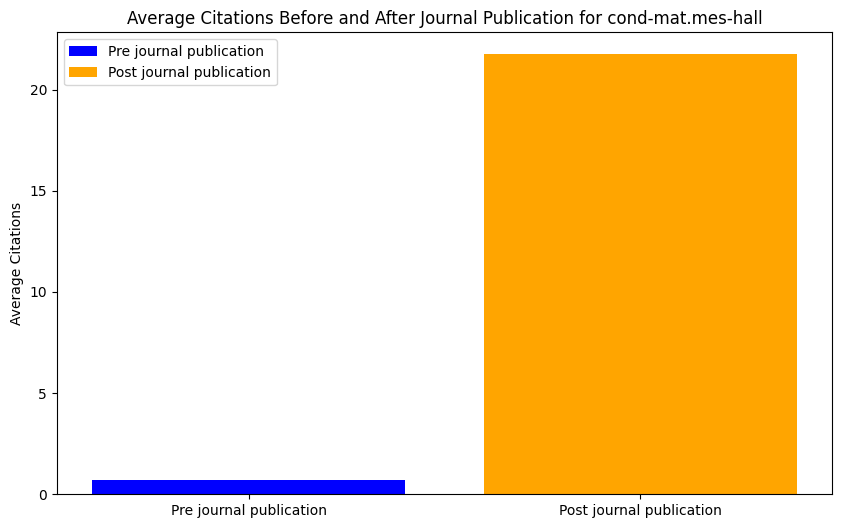

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get top 5 categories
top_5_categories = df_copy['categories'].value_counts().nlargest(5).index.tolist()

# Now let's plot it for each top category
for category in top_5_categories:
    df_category = df_copy[df_copy['categories'] == category]

    # Compute overall averages
    overall_avg_pre_journal_citation = np.mean(df_category['sum_pre_journal_citation'])
    overall_avg_post_journal_citation = np.mean(df_category['sum_post_journal_citation'])

    print(f"overall_avg_pre_journal_citation: {overall_avg_pre_journal_citation}")
    print(f"overall_avg_post_journal_citation: {overall_avg_post_journal_citation}")

    plt.figure(figsize=(10, 6))
    plt.bar('Pre journal publication', overall_avg_pre_journal_citation, color='blue', label='Pre journal publication')
    plt.bar('Post journal publication', overall_avg_post_journal_citation, color='orange', label='Post journal publication')

    plt.title(f'Average Citations Before and After Journal Publication for {category}')
    plt.ylabel('Average Citations')

    # Add a legend
    plt.legend()

    plt.show()


**all bars toghether**

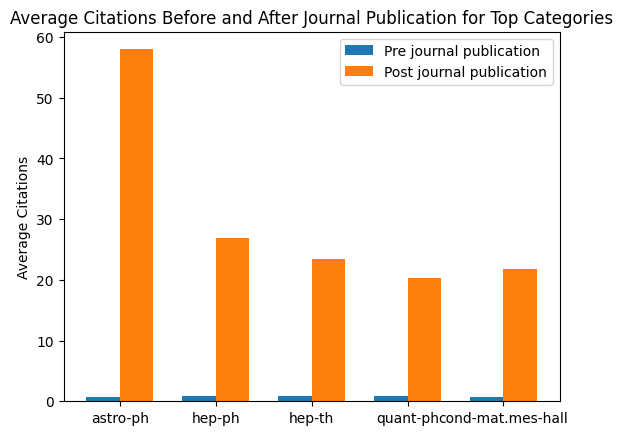

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get top 5 categories
top_5_categories = df_copy['categories'].value_counts().nlargest(5).index.tolist()

# Initialize list to store averages
pre_publication_avgs = []
post_publication_avgs = []

# Calculate averages for each category
for category in top_5_categories:
    df_category = df_copy[df_copy['categories'] == category]

    # Compute overall averages
    overall_avg_pre_journal_citation = np.mean(df_category['sum_pre_journal_citation'])
    overall_avg_post_journal_citation = np.mean(df_category['sum_post_journal_citation'])

    # Append averages to respective lists
    pre_publication_avgs.append(overall_avg_pre_journal_citation)
    post_publication_avgs.append(overall_avg_post_journal_citation)

# Define labels and bar width
labels = top_5_categories
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the figure and axes objects
fig, ax = plt.subplots()

# Add bars for 'pre-publication' and 'post-publication'
rects1 = ax.bar(x - width/2, pre_publication_avgs, width, label='Pre journal publication')
rects2 = ax.bar(x + width/2, post_publication_avgs, width, label='Post journal publication')

# Add labels, title, legend, etc.
ax.set_ylabel('Average Citations')
ax.set_title('Average Citations Before and After Journal Publication for Top Categories')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

**For median results**

overall_median_pre_journal_citation: 0.0
overall_median_post_journal_citation: 28.0


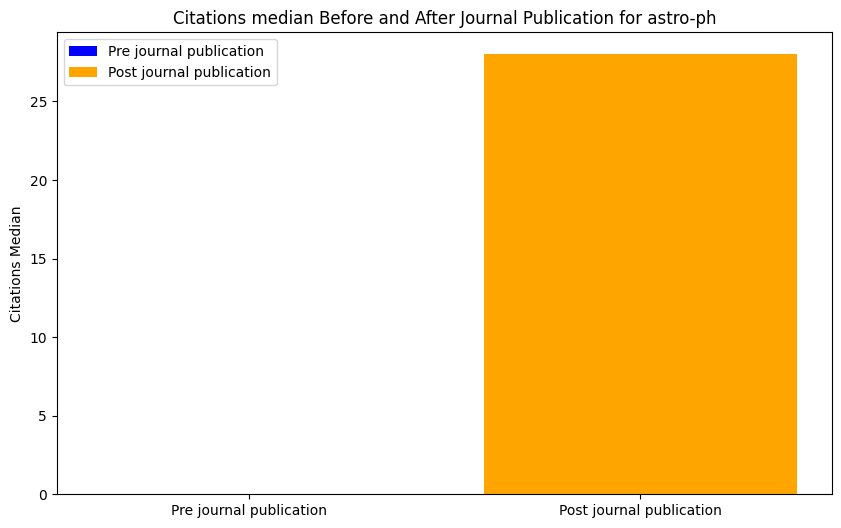

overall_median_pre_journal_citation: 0.0
overall_median_post_journal_citation: 11.0


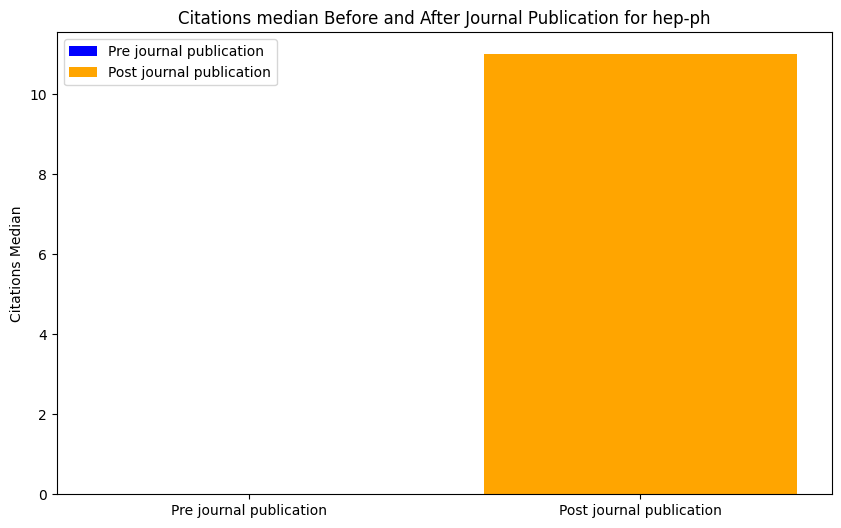

overall_median_pre_journal_citation: 0.0
overall_median_post_journal_citation: 9.0


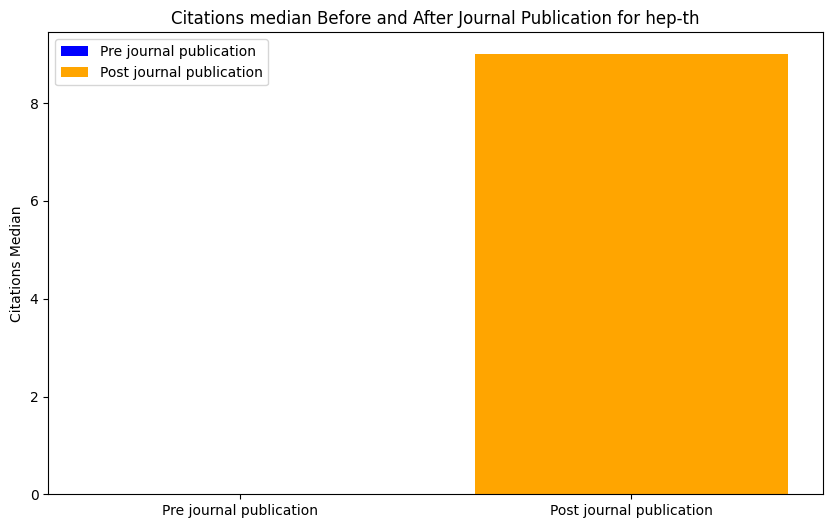

overall_median_pre_journal_citation: 0.0
overall_median_post_journal_citation: 8.0


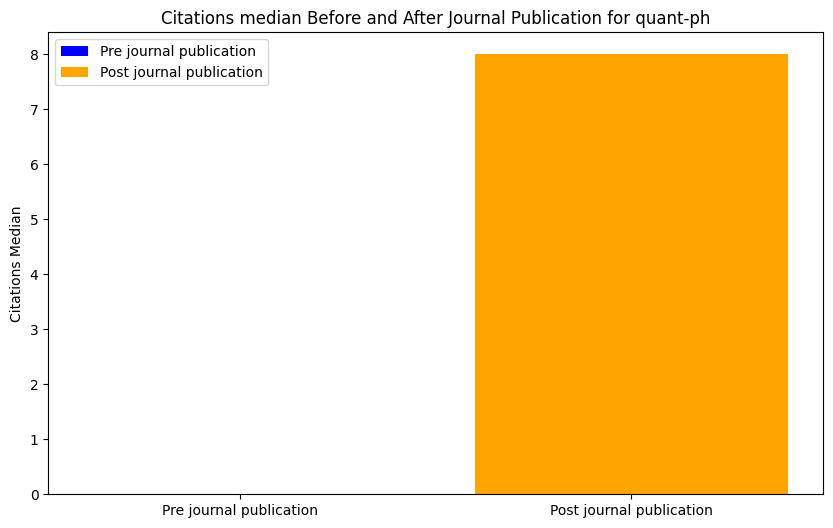

overall_median_pre_journal_citation: 0.0
overall_median_post_journal_citation: 8.0


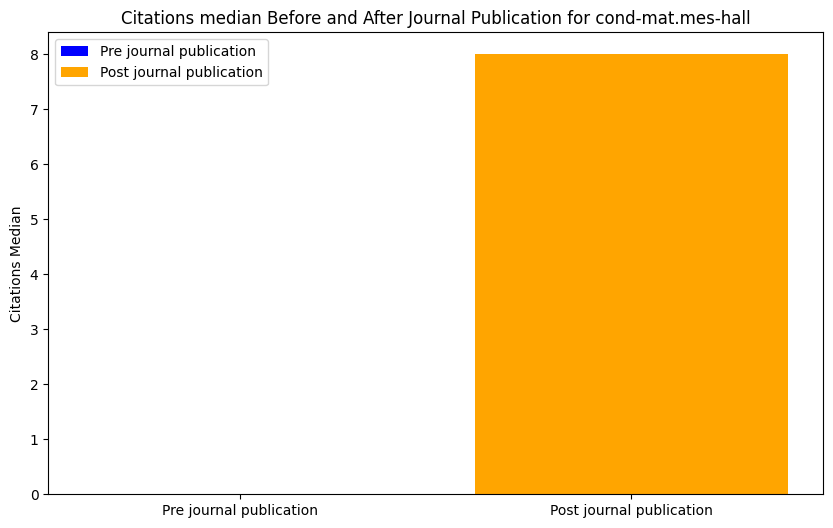

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get top 5 categories
top_5_categories = df_copy['categories'].value_counts().nlargest(5).index.tolist()

# Now let's plot it for each top category
for category in top_5_categories:
    df_category = df_copy[df_copy['categories'] == category]

    # Compute overall averages
    overall_median_pre_journal_citation = np.median(df_category['sum_pre_journal_citation'])
    overall_median_post_journal_citation = np.median(df_category['sum_post_journal_citation'])

    print(f"overall_median_pre_journal_citation: {overall_median_pre_journal_citation}")
    print(f"overall_median_post_journal_citation: {overall_median_post_journal_citation}")

    plt.figure(figsize=(10, 6))
    plt.bar('Pre journal publication', overall_median_pre_journal_citation, color='blue', label='Pre journal publication')
    plt.bar('Post journal publication', overall_median_post_journal_citation, color='orange', label='Post journal publication')

    plt.title(f'Citations median Before and After Journal Publication for {category}')
    plt.ylabel('Citations Median')

    # Add a legend
    plt.legend()

    plt.show()


**all bars together**

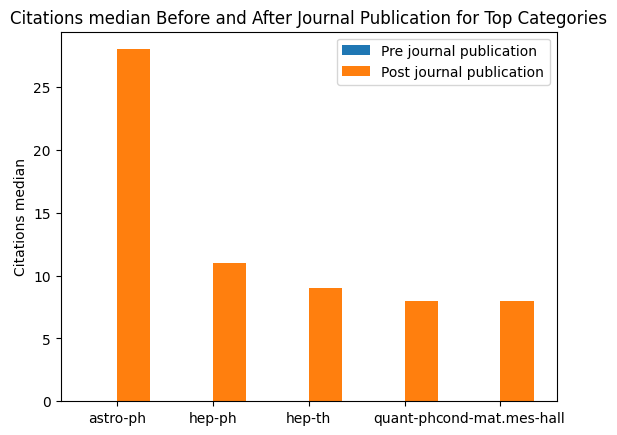

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get top 5 categories
top_5_categories = df_copy['categories'].value_counts().nlargest(5).index.tolist()

# Initialize list to store averages
pre_publication_medians = []
post_publication_medians = []

# Calculate averages for each category
for category in top_5_categories:
    df_category = df_copy[df_copy['categories'] == category]

    # Compute overall averages
    overall_median_pre_journal_citation = np.median(df_category['sum_pre_journal_citation'])
    overall_median_post_journal_citation = np.median(df_category['sum_post_journal_citation'])

    # Append averages to respective lists
    pre_publication_medians.append(overall_median_pre_journal_citation)
    post_publication_medians.append(overall_median_post_journal_citation)

# Define labels and bar width
labels = top_5_categories
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the figure and axes objects
fig, ax = plt.subplots()

# Add bars for 'pre-publication' and 'post-publication'
rects1 = ax.bar(x - width/2, pre_publication_medians, width, label='Pre journal publication')
rects2 = ax.bar(x + width/2, post_publication_medians, width, label='Post journal publication')

# Add labels, title, legend, etc.
ax.set_ylabel('Citations median')
ax.set_title('Citations median Before and After Journal Publication for Top Categories')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

##Now we will dive deeper to analyze the date according to more accurate and meaningfull timelines comparison, i.e., limit the dates and timeline which we comparing

In [ ]:
df_copy['first_publication_year'] = df_copy['first_publication_date'].dt.year
df_copy['journal_publication_year'] = df_copy['journal_publication_date'].dt.year
df_copy['first_publication_month'] = df_copy['first_publication_date'].dt.month
df_copy['journal_publication_month'] = df_copy['journal_publication_date'].dt.month

In [ ]:
df_copy

,Unnamed: 0,article_id_openalex,date_citation_counts,first_publication_date,journal_publication_date,article_type,categories,sum_pre_journal_citation,sum_post_journal_citation,first_publication_year,journal_publication_year,first_publication_month,journal_publication_month
0,1,https://openalex.org/W100014870,"{'1996-02-21': 1, '1997-01-11': 1, '1997-01-14...",1996-04-01,1996-07-01,journal-article,q-alg math.QA,1,14,1996,1996,4,7
1,2,https://openalex.org/W1000585164,"{'2015-10-22': 1, '2016-09-28': 1, '2016-10-21...",2015-07-24,2016-02-16,journal-article,hep-ph,1,7,2015,2016,7,2
2,3,https://openalex.org/W1000603767,"{'2011-06-11': 1, '2013-05-08': 1, '2013-10-24...",2012-09-24,2013-02-13,journal-article,quant-ph,1,8,2012,2013,9,2
3,4,https://openalex.org/W1000951278,"{'2012-10-25': 1, '2013-11-08': 1}",2012-03-20,2012-03-20,journal-article,stat.ME,0,2,2012,2012,3,3
4,5,https://openalex.org/W1001077819,"{'2015-11-11': 1, '2016-03-05': 1, '2016-03-16...",2015-07-30,2015-12-07,journal-article,cond-mat.mes-hall quant-ph,1,9,2015,2015,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842077,895922,https://openalex.org/W997665189,{'2016-03-17': 1},2015-07-17,2016-05-20,journal-article,hep-ph astro-ph.HE,1,0,2015,2016,7,5
842078,895923,https://openalex.org/W998121512,"{'2015-05-29': 1, '2015-09-11': 1, '2016-04-04...",2015-07-23,2015-07-23,journal-article,astro-ph.SR astro-ph.EP,1,12,2015,2015,7,7
842079,895924,https://openalex.org/W99824525,"{'2004-10-12': 1, '2004-12-25': 1, '2006-07-25...",2003-09-15,2004-06-22,journal-article,cond-mat.str-el,0,4,2003,2004,9,6
842080,895925,https://openalex.org/W998383075,"{'2015-05-28': 1, '2016-02-08': 1, '2017-04-12...",2013-11-28,2015-07-09,journal-article,astro-ph.HE astro-ph.CO,1,3,2013,2015,11,7


**For this specific analyze, lets calculate the date gaps (calculating the gap between the first publications to journal publications).**

In [ ]:
from datetime import timedelta

# First, let's calculate the difference in days between 'journal_publication_date' and 'first_publication_date'
df_copy['pub_date_diff'] = (df_copy['journal_publication_date'] - df_copy['first_publication_date']).dt.days
df_copy
# Now, let's filter rows where the difference is between half a year to a year
# df_copy = df_copy[(df_copy['pub_date_diff'] > 182) & (df_copy['pub_date_diff'] <= 365)]
# df_copy

,Unnamed: 0,article_id_openalex,date_citation_counts,first_publication_date,journal_publication_date,article_type,categories,sum_pre_journal_citation,sum_post_journal_citation,first_publication_year,journal_publication_year,first_publication_month,journal_publication_month,pub_date_diff
0,1,https://openalex.org/W100014870,"{'1996-02-21': 1, '1997-01-11': 1, '1997-01-14...",1996-04-01,1996-07-01,journal-article,q-alg math.QA,1,14,1996,1996,4,7,91
1,2,https://openalex.org/W1000585164,"{'2015-10-22': 1, '2016-09-28': 1, '2016-10-21...",2015-07-24,2016-02-16,journal-article,hep-ph,1,7,2015,2016,7,2,207
2,3,https://openalex.org/W1000603767,"{'2011-06-11': 1, '2013-05-08': 1, '2013-10-24...",2012-09-24,2013-02-13,journal-article,quant-ph,1,8,2012,2013,9,2,142
3,4,https://openalex.org/W1000951278,"{'2012-10-25': 1, '2013-11-08': 1}",2012-03-20,2012-03-20,journal-article,stat.ME,0,2,2012,2012,3,3,0
4,5,https://openalex.org/W1001077819,"{'2015-11-11': 1, '2016-03-05': 1, '2016-03-16...",2015-07-30,2015-12-07,journal-article,cond-mat.mes-hall quant-ph,1,9,2015,2015,7,12,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842077,895922,https://openalex.org/W997665189,{'2016-03-17': 1},2015-07-17,2016-05-20,journal-article,hep-ph astro-ph.HE,1,0,2015,2016,7,5,308
842078,895923,https://openalex.org/W998121512,"{'2015-05-29': 1, '2015-09-11': 1, '2016-04-04...",2015-07-23,2015-07-23,journal-article,astro-ph.SR astro-ph.EP,1,12,2015,2015,7,7,0
842079,895924,https://openalex.org/W99824525,"{'2004-10-12': 1, '2004-12-25': 1, '2006-07-25...",2003-09-15,2004-06-22,journal-article,cond-mat.str-el,0,4,2003,2004,9,6,281
842080,895925,https://openalex.org/W998383075,"{'2015-05-28': 1, '2016-02-08': 1, '2017-04-12...",2013-11-28,2015-07-09,journal-article,astro-ph.HE astro-ph.CO,1,3,2013,2015,11,7,588


**1) Take only the papers which the timline between the first publication to the journal publication is between half year to year**

In [ ]:
df_copy_half_to_one = df_copy[(df_copy['pub_date_diff'] > 182) & (df_copy['pub_date_diff'] <= 365)]
df_copy_half_to_one

,Unnamed: 0,article_id_openalex,date_citation_counts,first_publication_date,journal_publication_date,article_type,categories,sum_pre_journal_citation,sum_post_journal_citation,first_publication_year,journal_publication_year,first_publication_month,journal_publication_month,pub_date_diff
1,2,https://openalex.org/W1000585164,"{'2015-10-22': 1, '2016-09-28': 1, '2016-10-21...",2015-07-24,2016-02-16,journal-article,hep-ph,1,7,2015,2016,7,2,207
6,7,https://openalex.org/W1001253665,"{'2002-04-09': 1, '2002-06-20': 1, '2002-09-12...",2000-05-30,2001-03-16,journal-article,quant-ph math-ph math.MP,0,8,2000,2001,5,3,290
11,12,https://openalex.org/W100270686,"{'2005-08-15': 1, '2005-09-06': 1, '2006-04-17...",2004-07-01,2005-02-25,journal-article,cond-mat.supr-con cond-mat.str-el,0,12,2004,2005,7,2,239
15,16,https://openalex.org/W1003822170,"{'2015-08-25': 1, '2015-10-22': 1, '2015-12-10...",2015-07-24,2016-03-01,journal-article,quant-ph cond-mat.mes-hall,5,71,2015,2016,7,3,221
16,17,https://openalex.org/W100447351,"{'2017-03-22': 1, '2019-05-15': 1, '2020-10-09...",2014-08-28,2015-05-22,journal-article,q-fin.EC physics.data-an,0,4,2014,2015,8,5,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842073,895918,https://openalex.org/W99544751,"{'1998-03-25': 1, '1998-06-12': 1, '1998-09-28...",1998-01-30,1998-08-10,journal-article,hep-ph,2,59,1998,1998,1,8,192
842074,895919,https://openalex.org/W99546097,"{'2002-06-19': 1, '2002-08-11': 1, '2002-09-12...",2001-12-19,2002-06-28,journal-article,hep-ph hep-ex,1,64,2001,2002,12,6,191
842076,895921,https://openalex.org/W996914278,"{'2015-07-02': 1, '2015-07-20': 1, '2016-01-15...",2015-07-20,2016-07-06,journal-article,astro-ph.CO,14,105,2015,2016,7,7,352
842077,895922,https://openalex.org/W997665189,{'2016-03-17': 1},2015-07-17,2016-05-20,journal-article,hep-ph astro-ph.HE,1,0,2015,2016,7,5,308


**Since the citations before the journal publication in the current situation are between half year to year, we will sum of post journal publication citation only in the first year (only the first year citation after it published on the journal)**

**We do so in order to make comparison more sensable, since the post citations could spread for years which will make the comparison to pre citations irrelevant

**Like before lets plot the mean and median for the data (without specific categories)**

**Average results**

100%|██████████| 156064/156064 [02:19<00:00, 1117.75it/s]
<ipython-input-22-2ed86819fe40>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_half_to_one[['sum_pre_journal_citation', 'sum_post_journal_citation']] = df_copy_half_to_one.progress_apply(compute_avg_citations, axis=1)


<Figure size 1000x600 with 0 Axes>

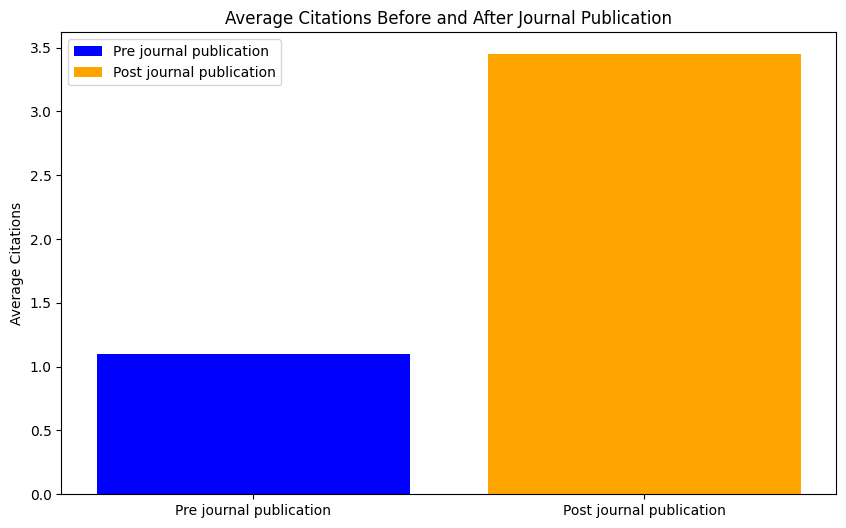

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import ast
import numpy as np
from tqdm import tqdm
tqdm.pandas()

# # Conversion of string representation of dictionary to dictionary
# df_copy_half_to_one['date_citation_counts'] = df_copy_half_to_one['date_citation_counts'].apply(ast.literal_eval)

# # Conversion of string to datetime
# df_copy_half_to_one['first_publication_date'] = pd.to_datetime(df_copy_half_to_one['first_publication_date'])
# df_copy_half_to_one['journal_publication_date'] = pd.to_datetime(df_copy_half_to_one['journal_publication_date'])

# Function to compute average citations before and after journal publication
# def compute_avg_citations(row):
#     date_citations = {datetime.strptime(date, "%Y-%m-%d"): count for date, count in row['date_citation_counts'].items()}
#     pre_journal_citations = [count for date, count in date_citations.items() if date <= row['journal_publication_date']]
#     post_journal_citations = [count for date, count in date_citations.items() if date > row['journal_publication_date']]

#     sum_pre_journal_citation = sum(pre_journal_citations) #/ len(pre_journal_citations) if pre_journal_citations else 0
#     sum_post_journal_citation = sum(post_journal_citations) #/ len(post_journal_citations) if post_journal_citations else 0

#     return pd.Series([sum_pre_journal_citation, sum_post_journal_citation])
from datetime import timedelta

def compute_avg_citations(row):
    date_citations = {datetime.strptime(date, "%Y-%m-%d"): count for date, count in row['date_citation_counts'].items()}
    pre_journal_citations = [count for date, count in date_citations.items() if row['first_publication_date'] <= date < row['journal_publication_date']]
    one_year_after_journal_publication = row['journal_publication_date'] + timedelta(days=365)
    post_journal_citations = [count for date, count in date_citations.items() if row['journal_publication_date'] <= date <= one_year_after_journal_publication]

    sum_pre_journal_citation = sum(pre_journal_citations) if pre_journal_citations else 0
    sum_post_journal_citation = sum(post_journal_citations) if post_journal_citations else 0

    return pd.Series([sum_pre_journal_citation, sum_post_journal_citation])



# Apply the function to the DataFrame
df_copy_half_to_one[['sum_pre_journal_citation', 'sum_post_journal_citation']] = df_copy_half_to_one.progress_apply(compute_avg_citations, axis=1)

# Compute overall averages
overall_avg_pre_journal_citation = np.mean(df_copy_half_to_one['sum_pre_journal_citation'])
overall_avg_post_journal_citation = np.mean(df_copy_half_to_one['sum_post_journal_citation'])

# Now let's plot it
plt.figure(figsize=(10, 6))

# Now let's plot it
plt.figure(figsize=(10, 6))

# Plot each bar individually, assign different colors and labels for the legend
plt.bar('Pre journal publication', overall_avg_pre_journal_citation, color='blue', label='Pre journal publication')
plt.bar('Post journal publication', overall_avg_post_journal_citation, color='orange', label='Post journal publication')

plt.title('Average Citations Before and After Journal Publication')
plt.ylabel('Average Citations')

# Add a legend
plt.legend()

plt.show()


**Median results**

<Figure size 1000x600 with 0 Axes>

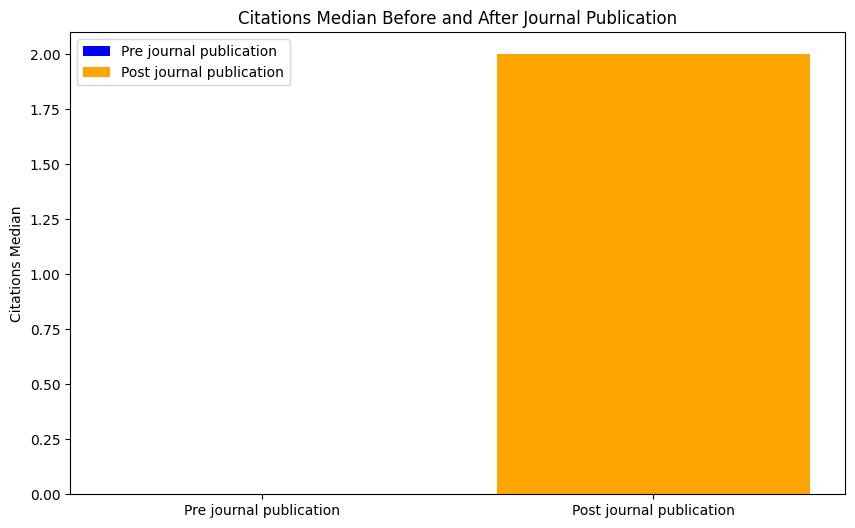

In [ ]:
# Compute overall averages
overall_median_pre_journal_citation = np.median(df_copy_half_to_one['sum_pre_journal_citation'])
overall_median_post_journal_citation = np.median(df_copy_half_to_one['sum_post_journal_citation'])

# Now let's plot it
plt.figure(figsize=(10, 6))

# Now let's plot it
plt.figure(figsize=(10, 6))

# Plot each bar individually, assign different colors and labels for the legend
plt.bar('Pre journal publication', overall_median_pre_journal_citation, color='blue', label='Pre journal publication')
plt.bar('Post journal publication', overall_median_post_journal_citation, color='orange', label='Post journal publication')

plt.title('Citations Median Before and After Journal Publication')
plt.ylabel('Citations Median')

# Add a legend
plt.legend()

**Now similarly, according to category**

In [ ]:
 df_copy_half_to_one['categories'].value_counts()

hep-ph                                          9944
quant-ph                                        7898
hep-th                                          7236
astro-ph                                        7158
cond-mat.mes-hall                               4910
                                                ... 
cond-mat.stat-mech math.MG physics.atm-clus        1
cs.MA cs.SY stat.CO                                1
cond-mat.mtrl-sci astro-ph.EP physics.geo-ph       1
stat.AP physics.med-ph                             1
q-bio.GN cond-mat.stat-mech math.ST stat.TH        1
Name: categories, Length: 11830, dtype: int64

In [ ]:
top_5_categories = df_copy_half_to_one['categories'].value_counts().nlargest(5).index.tolist()
top_5_categories

['hep-ph', 'quant-ph', 'hep-th', 'astro-ph', 'cond-mat.mes-hall']

**Average results**

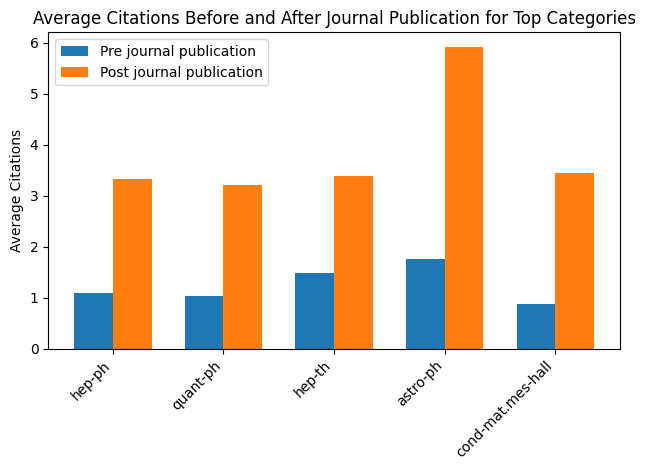

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get top 5 categories
top_5_categories = df_copy_half_to_one['categories'].value_counts().nlargest(5).index.tolist()

# Initialize list to store averages
pre_publication_avgs = []
post_publication_avgs = []

# Calculate averages for each category
for category in top_5_categories:
    df_category = df_copy_half_to_one[df_copy_half_to_one['categories'] == category]

    # Compute overall averages
    overall_avg_pre_journal_citation = np.mean(df_category['sum_pre_journal_citation'])
    overall_avg_post_journal_citation = np.mean(df_category['sum_post_journal_citation'])

    # Append averages to respective lists
    pre_publication_avgs.append(overall_avg_pre_journal_citation)
    post_publication_avgs.append(overall_avg_post_journal_citation)

# Define labels and bar width
labels = top_5_categories
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the figure and axes objects
fig, ax = plt.subplots()

# Add bars for 'pre-publication' and 'post-publication'
rects1 = ax.bar(x - width/2, pre_publication_avgs, width, label='Pre journal publication')
rects2 = ax.bar(x + width/2, post_publication_avgs, width, label='Post journal publication')

# Add labels, title, legend, etc.
ax.set_ylabel('Average Citations')
ax.set_title('Average Citations Before and After Journal Publication for Top Categories')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# # Display the plot
# plt.show()
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right") # Rotate labels 45 degrees
ax.legend()

# Display the plot
plt.tight_layout()  # This will ensure that all labels are within the figure
plt.show()

**Median results**

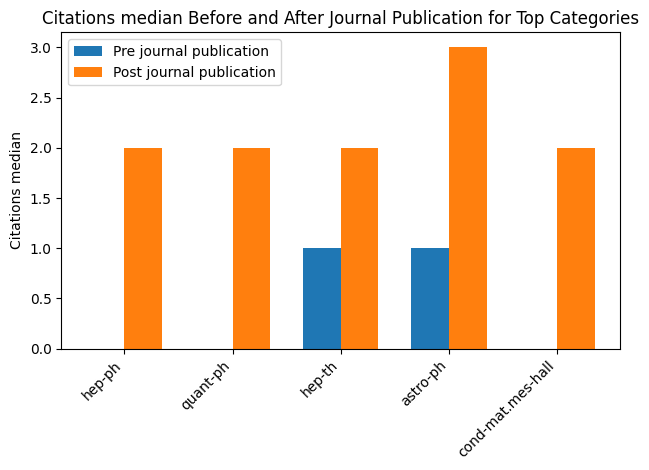

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get top 5 categories
top_5_categories = df_copy_half_to_one['categories'].value_counts().nlargest(5).index.tolist()

# Initialize list to store averages
pre_publication_medians = []
post_publication_medians = []

# Calculate averages for each category
for category in top_5_categories:
    df_category = df_copy_half_to_one[df_copy_half_to_one['categories'] == category]

    # Compute overall averages
    overall_median_pre_journal_citation = np.median(df_category['sum_pre_journal_citation'])
    overall_median_post_journal_citation = np.median(df_category['sum_post_journal_citation'])

    # Append averages to respective lists
    pre_publication_medians.append(overall_median_pre_journal_citation)
    post_publication_medians.append(overall_median_post_journal_citation)

# Define labels and bar width
labels = top_5_categories
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the figure and axes objects
fig, ax = plt.subplots()

# Add bars for 'pre-publication' and 'post-publication'
rects1 = ax.bar(x - width/2, pre_publication_medians, width, label='Pre journal publication')
rects2 = ax.bar(x + width/2, post_publication_medians, width, label='Post journal publication')

# Add labels, title, legend, etc.
ax.set_ylabel('Citations median')
ax.set_title('Citations median Before and After Journal Publication for Top Categories')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# # Display the plot
# plt.show()
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right") # Rotate labels 45 degrees
ax.legend()

# Display the plot
plt.tight_layout()  # This will ensure that all labels are within the figure
plt.show()

**2) Take only the papers which the timline between the first publication to the journal publication is between two and half year to three year**

In [ ]:
df_copy_two_half_to_three = df_copy[(df_copy['pub_date_diff'] > 912) & (df_copy['pub_date_diff'] <= 1095)]
df_copy_two_half_to_three

,Unnamed: 0,article_id_openalex,date_citation_counts,first_publication_date,journal_publication_date,article_type,categories,sum_pre_journal_citation,sum_post_journal_citation,first_publication_year,journal_publication_year,first_publication_month,journal_publication_month,pub_date_diff
221,236,https://openalex.org/W109684856,"{'2015-04-25': 1, '2016-04-29': 1, '2018-10-03...",2013-02-15,2015-10-05,journal-article,math.MG math.AP,1,3,2013,2015,2,10,962
274,300,https://openalex.org/W113711997,"{'2000-06-12': 1, '2002-07-14': 1, '2016-01-08...",1998-11-20,2001-06-14,journal-article,hep-th,1,2,1998,2001,11,6,937
357,395,https://openalex.org/W1171059800,"{'2016-02-18': 1, '2017-04-27': 1, '2017-09-26...",2012-12-29,2015-08-19,journal-article,astro-ph.GA astro-ph.SR,0,6,2012,2015,12,8,963
369,407,https://openalex.org/W117540911,{'2018-10-05': 1},2014-05-27,2016-12-01,journal-article,cs.NI,0,1,2014,2016,5,12,919
842,910,https://openalex.org/W1440617292,"{'2018-12-05': 1, '2020-10-20': 1, '2021-10-06...",2013-06-13,2016-02-01,journal-article,stat.ME stat.CO,0,3,2013,2016,6,2,963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841223,895001,https://openalex.org/W798717892,"{'2018-06-15': 1, '2020-07-09': 1, '2021-02-24...",2015-06-23,2018-04-30,journal-article,quant-ph,0,6,2015,2018,6,4,1042
841541,895337,https://openalex.org/W846586748,"{'2014-12-16': 1, '2016-04-01': 1, '2018-03-14...",2013-10-08,2016-05-01,journal-article,quant-ph,2,3,2013,2016,10,5,936
841609,895409,https://openalex.org/W854353948,"{'2014-01-30': 1, '2014-05-13': 1, '2014-09-27...",2012-11-05,2015-07-07,journal-article,quant-ph,12,72,2012,2015,11,7,974
841653,895456,https://openalex.org/W86197152,"{'2018-07-01': 1, '2020-06-22': 1, '2020-07-06...",2014-02-10,2016-09-01,journal-article,cs.ET cond-mat.dis-nn,0,3,2014,2016,2,9,934


**Since the citations before the journal publication in the current situation are between two and half year to thre  year, we will sum of post journal publication citation only in the first three year (only the first three year citation after it published on the journal)**

**We do so in order to make comparison more sensable, since the post citations could spread for years which will make the comparison to pre citations irrelevant

**Like before lets plot the mean and median for the data (without specific categories)**

**Average results**

100%|██████████| 3413/3413 [00:01<00:00, 1975.21it/s]
<ipython-input-34-32e02a0b846d>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_two_half_to_three[['sum_pre_journal_citation', 'sum_post_journal_citation']] = df_copy_two_half_to_three.progress_apply(compute_avg_citations, axis=1)


<Figure size 1000x600 with 0 Axes>

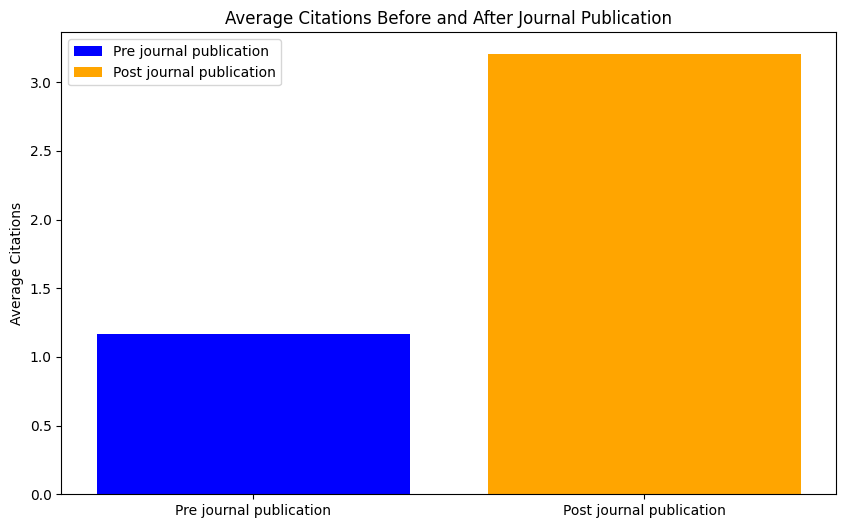

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import ast
import numpy as np
from tqdm import tqdm
tqdm.pandas()

# # Conversion of string representation of dictionary to dictionary
# df_copy_two_half_to_three['date_citation_counts'] = df_copy_two_half_to_three['date_citation_counts'].apply(ast.literal_eval)

# # Conversion of string to datetime
# df_copy_two_half_to_three['first_publication_date'] = pd.to_datetime(df_copy_two_half_to_three['first_publication_date'])
# df_copy_two_half_to_three['journal_publication_date'] = pd.to_datetime(df_copy_two_half_to_three['journal_publication_date'])

# Function to compute average citations before and after journal publication
# def compute_avg_citations(row):
#     date_citations = {datetime.strptime(date, "%Y-%m-%d"): count for date, count in row['date_citation_counts'].items()}
#     pre_journal_citations = [count for date, count in date_citations.items() if date <= row['journal_publication_date']]
#     post_journal_citations = [count for date, count in date_citations.items() if date > row['journal_publication_date']]

#     sum_pre_journal_citation = sum(pre_journal_citations) #/ len(pre_journal_citations) if pre_journal_citations else 0
#     sum_post_journal_citation = sum(post_journal_citations) #/ len(post_journal_citations) if post_journal_citations else 0

#     return pd.Series([sum_pre_journal_citation, sum_post_journal_citation])
from datetime import timedelta

def compute_avg_citations(row):
    date_citations = {datetime.strptime(date, "%Y-%m-%d"): count for date, count in row['date_citation_counts'].items()}
    pre_journal_citations = [count for date, count in date_citations.items() if row['first_publication_date'] <= date < row['journal_publication_date']]
    one_year_after_journal_publication = row['journal_publication_date'] + timedelta(days=1095)
    post_journal_citations = [count for date, count in date_citations.items() if row['journal_publication_date'] <= date <= one_year_after_journal_publication]

    sum_pre_journal_citation = sum(pre_journal_citations) if pre_journal_citations else 0
    sum_post_journal_citation = sum(post_journal_citations) if post_journal_citations else 0

    return pd.Series([sum_pre_journal_citation, sum_post_journal_citation])



# Apply the function to the DataFrame
df_copy_two_half_to_three[['sum_pre_journal_citation', 'sum_post_journal_citation']] = df_copy_two_half_to_three.progress_apply(compute_avg_citations, axis=1)

# Compute overall averages
overall_avg_pre_journal_citation = np.mean(df_copy_two_half_to_three['sum_pre_journal_citation'])
overall_avg_post_journal_citation = np.mean(df_copy_two_half_to_three['sum_post_journal_citation'])

# Now let's plot it
plt.figure(figsize=(10, 6))

# Now let's plot it
plt.figure(figsize=(10, 6))

# Plot each bar individually, assign different colors and labels for the legend
plt.bar('Pre journal publication', overall_avg_pre_journal_citation, color='blue', label='Pre journal publication')
plt.bar('Post journal publication', overall_avg_post_journal_citation, color='orange', label='Post journal publication')

plt.title('Average Citations Before and After Journal Publication')
plt.ylabel('Average Citations')

# Add a legend
plt.legend()

plt.show()


**Median results**

<Figure size 1000x600 with 0 Axes>

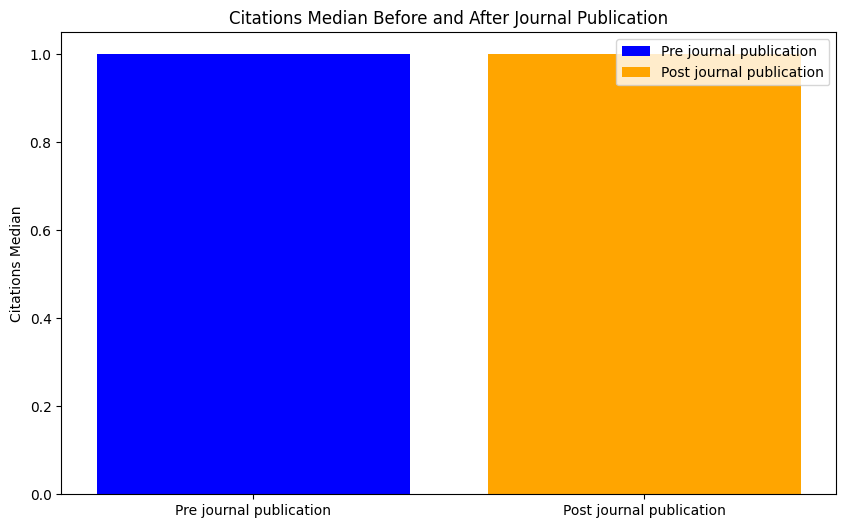

In [ ]:
# Compute overall averages
overall_median_pre_journal_citation = np.median(df_copy_two_half_to_three['sum_pre_journal_citation'])
overall_median_post_journal_citation = np.median(df_copy_two_half_to_three['sum_post_journal_citation'])

# Now let's plot it
plt.figure(figsize=(10, 6))

# Now let's plot it
plt.figure(figsize=(10, 6))

# Plot each bar individually, assign different colors and labels for the legend
plt.bar('Pre journal publication', overall_median_pre_journal_citation, color='blue', label='Pre journal publication')
plt.bar('Post journal publication', overall_median_post_journal_citation, color='orange', label='Post journal publication')

plt.title('Citations Median Before and After Journal Publication')
plt.ylabel('Citations Median')

# Add a legend
plt.legend()

**Now similarly, according to category**

In [ ]:
 df_copy_two_half_to_three['categories'].value_counts()

quant-ph                            120
math.PR                              94
math.AG                              79
hep-th                               64
hep-ph                               64
                                   ... 
math.CO math-ph math.MP math.PR       1
cs.AI cs.CV cs.LG                     1
q-fin.EC physics.soc-ph q-fin.GN      1
physics.soc-ph nlin.AO q-bio.PE       1
cs.ET cond-mat.dis-nn                 1
Name: categories, Length: 1212, dtype: int64

In [ ]:
top_5_categories = df_copy_two_half_to_three['categories'].value_counts().nlargest(5).index.tolist()
top_5_categories

['quant-ph', 'math.PR', 'math.AG', 'hep-th', 'hep-ph']

**Average results**

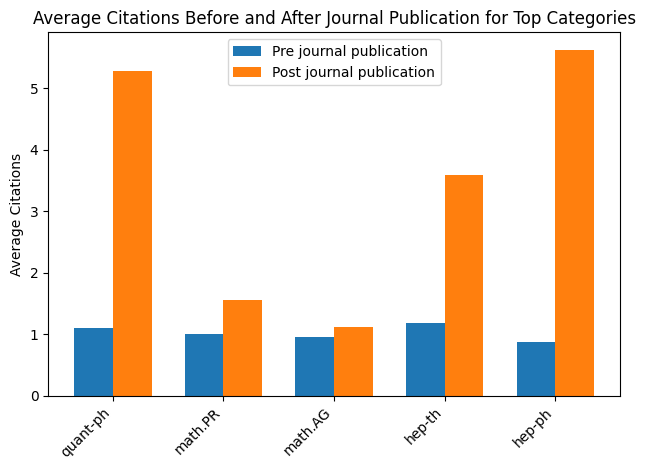

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get top 5 categories
top_5_categories = df_copy_two_half_to_three['categories'].value_counts().nlargest(5).index.tolist()

# Initialize list to store averages
pre_publication_avgs = []
post_publication_avgs = []

# Calculate averages for each category
for category in top_5_categories:
    df_category = df_copy_two_half_to_three[df_copy_two_half_to_three['categories'] == category]

    # Compute overall averages
    overall_avg_pre_journal_citation = np.mean(df_category['sum_pre_journal_citation'])
    overall_avg_post_journal_citation = np.mean(df_category['sum_post_journal_citation'])

    # Append averages to respective lists
    pre_publication_avgs.append(overall_avg_pre_journal_citation)
    post_publication_avgs.append(overall_avg_post_journal_citation)

# Define labels and bar width
labels = top_5_categories
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the figure and axes objects
fig, ax = plt.subplots()

# Add bars for 'pre-publication' and 'post-publication'
rects1 = ax.bar(x - width/2, pre_publication_avgs, width, label='Pre journal publication')
rects2 = ax.bar(x + width/2, post_publication_avgs, width, label='Post journal publication')

# Add labels, title, legend, etc.
ax.set_ylabel('Average Citations')
ax.set_title('Average Citations Before and After Journal Publication for Top Categories')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# # Display the plot
# plt.show()
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right") # Rotate labels 45 degrees
ax.legend()

# Display the plot
plt.tight_layout()  # This will ensure that all labels are within the figure
plt.show()

**Median results**

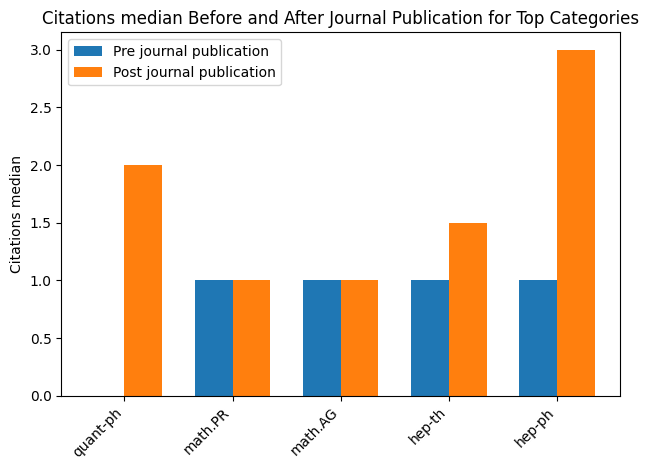

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get top 5 categories
top_5_categories = df_copy_two_half_to_three['categories'].value_counts().nlargest(5).index.tolist()

# Initialize list to store averages
pre_publication_medians = []
post_publication_medians = []

# Calculate averages for each category
for category in top_5_categories:
    df_category = df_copy_two_half_to_three[df_copy_two_half_to_three['categories'] == category]

    # Compute overall averages
    overall_median_pre_journal_citation = np.median(df_category['sum_pre_journal_citation'])
    overall_median_post_journal_citation = np.median(df_category['sum_post_journal_citation'])

    # Append averages to respective lists
    pre_publication_medians.append(overall_median_pre_journal_citation)
    post_publication_medians.append(overall_median_post_journal_citation)

# Define labels and bar width
labels = top_5_categories
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the figure and axes objects
fig, ax = plt.subplots()

# Add bars for 'pre-publication' and 'post-publication'
rects1 = ax.bar(x - width/2, pre_publication_medians, width, label='Pre journal publication')
rects2 = ax.bar(x + width/2, post_publication_medians, width, label='Post journal publication')

# Add labels, title, legend, etc.
ax.set_ylabel('Citations median')
ax.set_title('Citations median Before and After Journal Publication for Top Categories')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# # Display the plot
# plt.show()
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right") # Rotate labels 45 degrees
ax.legend()

# Display the plot
plt.tight_layout()  # This will ensure that all labels are within the figure
plt.show()

##Second Scenario - Citation Rate Over the Years

##Average amount of citations over the years from the first publication of articles until today with reference to the year of publication in the journal

In [ ]:
df_copy['first_publication_year'].value_counts()

2018    47170
2019    46710
2020    46607
2017    45428
2016    45299
2015    41707
2014    41065
2013    39765
2012    38297
2011    36581
2021    36556
2010    33836
2009    31497
2008    29935
2007    27508
2005    24746
2006    24645
2004    23579
2003    21719
2002    19819
2001    18319
2000    16316
2022    14435
1999    14109
1998    12502
1997    10812
1996     8932
1995     7375
1994     5934
1993     4295
1992     2102
1991      220
2023      189
1990        2
1986        1
Name: first_publication_year, dtype: int64

In [ ]:
df_copy['journal_publication_year'].value_counts()

2020    48752
2019    46880
2018    45853
2017    44875
2021    44656
2016    44520
2014    40085
2015    39605
2013    39412
2012    37606
2011    35291
2010    32726
2009    31001
2008    29323
2007    26115
2006    24852
2005    24600
2022    24522
2004    22890
2003    20033
2002    19131
2001    17886
2000    15426
1999    13217
1998    12150
1997     9884
1996     8192
1995     6838
1994     5215
1993     3342
2023     1816
1992     1226
1991       91
1986        1
Name: journal_publication_year, dtype: int64

**A function for plotting average citations over the years for a given initial publication date and journal publication date**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_average_citations(df_copy, first_pub_year, journal_pub_year):
    # Filter articles with first_publication_date in the first_pub_year and journal_publication_date in the journal_pub_year
    selected_articles = df_copy[
        (df_copy['first_publication_date'].dt.year == first_pub_year) &
        (df_copy['journal_publication_date'].dt.year == journal_pub_year)
    ]

    # Extract the number of citations by date for each article
    citations_by_year = {}
    for index, row in selected_articles.iterrows():
        date_citations = row['date_citation_counts']
        for date_str, citation_count in date_citations.items():
            date = datetime.strptime(date_str, "%Y-%m-%d")
            year = date.year
            citations_by_year.setdefault(year, []).append(citation_count)

    # Compute the average number of citations for each year from first_pub_year to 2023 (today)
    years = range(first_pub_year, 2024)
    try:
        average_citations_by_year = [sum(citations_by_year.get(year, [0])) / len(selected_articles) for year in years]
    except ZeroDivisionError:
        average_citations_by_year = [0] * len(years)

    # Compute the average citations for the first publication year (first_pub_year)
    citations_first_year = citations_by_year.get(first_pub_year, [0])
    average_citations_first_year = sum(citations_first_year) / len(selected_articles)

    # Create the graph with lines and dots
    plt.figure(figsize=(10, 6))
    plt.plot(years, average_citations_by_year, color='blue', marker='o', linestyle='-', label='Average Citations')
    #plt.plot(first_pub_year, average_citations_first_year, color='green', marker='o', linestyle='-', label=f'First Publication Year ({first_pub_year})')
    plt.scatter(years, average_citations_by_year, color='blue')
    #plt.scatter(first_pub_year, average_citations_first_year, color='green')
    plt.axvline(x=first_pub_year, color='green', linestyle='--', label=f'First Publication Year')
    plt.axvline(x=journal_pub_year, color='red', linestyle='--', label=f'Journal Publication Year')
    plt.xlabel('Year', fontsize=14)  # Adjust fontsize for X-axis label
    plt.ylabel('Average Citations', fontsize=14)  # Adjust fontsize for Y-axis label
    plt.title(f'Average Citations Each Year ({first_pub_year} to 2023)', fontsize=16)  # Adjust fontsize for the title
    plt.xticks(years, fontsize=12)  # Adjust fontsize for X-axis ticks
    plt.yticks(fontsize=12)  # Adjust fontsize for Y-axis ticks
    plt.legend(fontsize=12)  # Adjust fontsize for the legend
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

**A function for plotting average citations over the years for the 5-top categories for a given initial publication date and journal publication date.**

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from datetime import datetime

# def plot_average_citations_by_category(df_copy, first_pub_year, journal_pub_year):
#     # Get the top 5 categories based on their occurrence count
#     top_categories = df_copy['categories'].value_counts().nlargest(5).index

#     # Loop through each category, filter articles, and compute average citations
#     plt.figure(figsize=(10, 6))
#     for category in top_categories:
#         selected_articles = df_copy[
#             (df_copy['first_publication_date'].dt.year == first_pub_year) &
#             (df_copy['journal_publication_date'].dt.year == journal_pub_year) &
#             (df_copy['categories'] == category)
#         ]

#         citations_by_year = {}
#         for index, row in selected_articles.iterrows():
#             date_citations = row['date_citation_counts']
#             for date_str, citation_count in date_citations.items():
#                 date = datetime.strptime(date_str, "%Y-%m-%d")
#                 year = date.year
#                 citations_by_year.setdefault(year, []).append(citation_count)

#         years = range(first_pub_year, 2024)
#         try:
#             average_citations_by_year = [sum(citations_by_year.get(year, [0])) / len(selected_articles) for year in years]
#         except ZeroDivisionError:
#             average_citations_by_year = [0] * len(years)

#         # Create the graph with lines and dots for each category
#         plt.plot(years, average_citations_by_year, marker='o', linestyle='-', label=category)

#     # Add the vertical lines for the first publication year and the journal publication year
#     plt.axvline(x=first_pub_year, color='green', linestyle='--', label=f'First Publication Year ({first_pub_year})')
#     plt.axvline(x=journal_pub_year, color='red', linestyle='--', label=f'Journal Publication Year ({journal_pub_year})')

#     plt.xlabel('Year')
#     plt.ylabel('Average Citations')
#     plt.title(f'Average Citations by Categories For Each Year ({first_pub_year} to 2023)')
#     plt.xticks(years)
#     plt.legend()
#     plt.grid(True, linestyle='--', alpha=0.7)
#     plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_average_citations_by_category(df_copy, first_pub_year, journal_pub_year):
    articles_by_years = df_copy[
            (df_copy['first_publication_date'].dt.year == first_pub_year) &
            (df_copy['journal_publication_date'].dt.year == journal_pub_year)
        ]

    # Get the top 5 categories based on their occurrence count
    top_categories = articles_by_years['categories'].value_counts().nlargest(5).index.tolist()

    # Loop through each category, filter articles, and compute average citations
    plt.figure(figsize=(10, 6))
    for category in top_categories:
        selected_articles = articles_by_years[
            (articles_by_years['categories'] == category)
        ]

        citations_by_year = {}
        for index, row in selected_articles.iterrows():
            date_citations = row['date_citation_counts']
            for date_str, citation_count in date_citations.items():
                date = datetime.strptime(date_str, "%Y-%m-%d")
                year = date.year
                citations_by_year.setdefault(year, []).append(citation_count)

        years = range(first_pub_year, 2024)
        try:
            average_citations_by_year = [sum(citations_by_year.get(year, [0])) / len(selected_articles) for year in years]
        except ZeroDivisionError:
            average_citations_by_year = [0] * len(years)

        # Create the graph with lines and dots for each category
        plt.plot(years, average_citations_by_year, marker='o', linestyle='-', label=category)

    # Add the vertical lines for the first publication year and the journal publication year
    plt.axvline(x=first_pub_year, color='green', linestyle='--', label=f'First Publication Year')
    plt.axvline(x=journal_pub_year, color='red', linestyle='--', label=f'Journal Publication Year')

    plt.xlabel('Year', fontsize=14)  # Adjust fontsize for X-axis label
    plt.ylabel('Average Citations', fontsize=14)  # Adjust fontsize for Y-axis label
    plt.title(f'Average Citations by Categories For Each Year ({first_pub_year} to 2023)', fontsize=16)  # Adjust fontsize for the title
    plt.xticks(years, fontsize=12)  # Adjust fontsize for X-axis ticks
    plt.yticks(fontsize=12)  # Adjust fontsize for Y-axis ticks
    plt.legend(fontsize=12, loc='upper left')  # Adjust fontsize for the legend
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Average citations by year for articles that were first published in year 2018 and later published as journal articles in year 2021

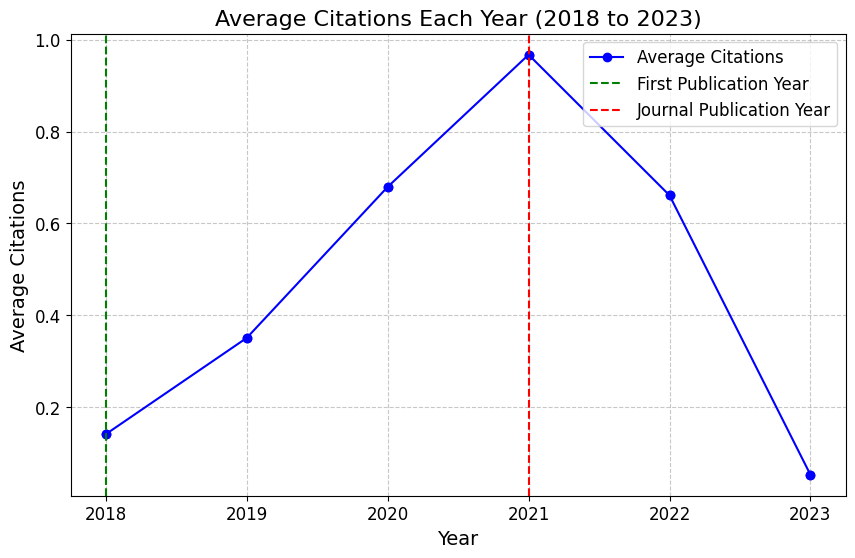

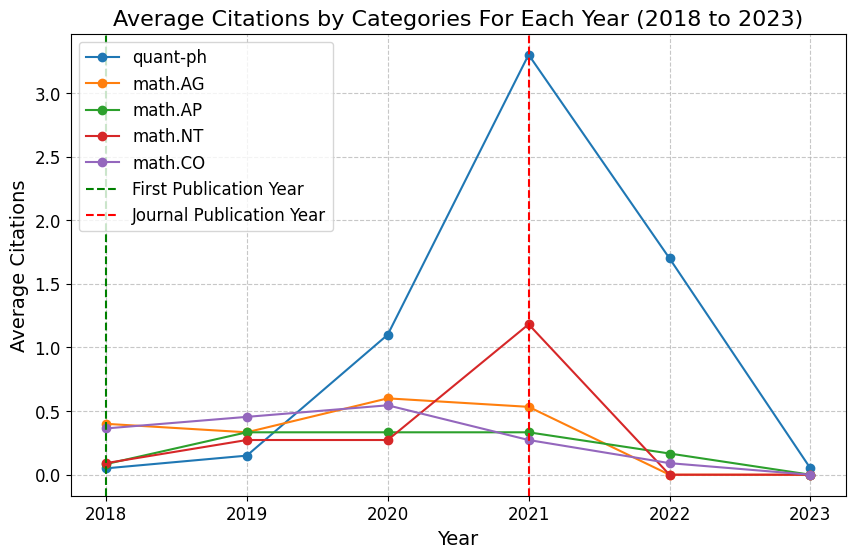

In [ ]:
plot_average_citations(df_copy, 2018, 2021)
plot_average_citations_by_category(df_copy, 2018, 2021)

Average citations by year for articles that were first published in year 2017 and later published as journal articles in year 2020

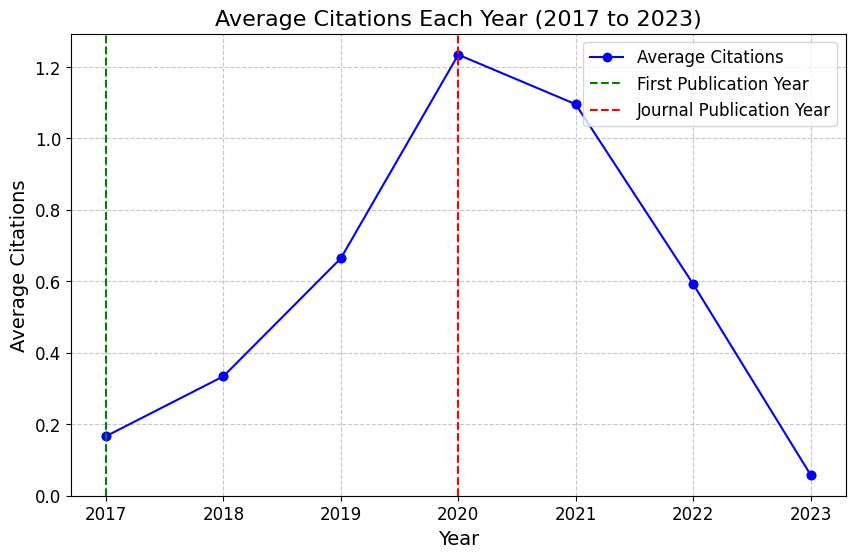

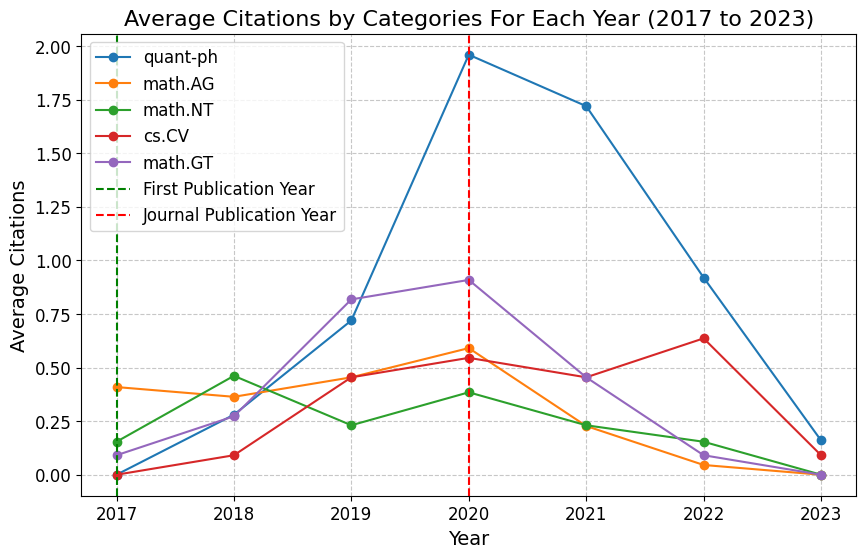

In [ ]:
plot_average_citations(df_copy, 2017, 2020)
plot_average_citations_by_category(df_copy, 2017, 2020)

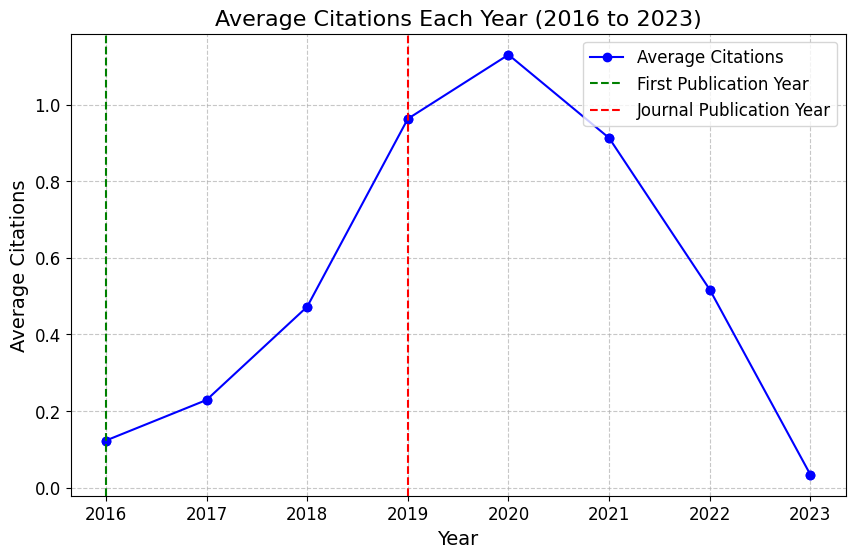

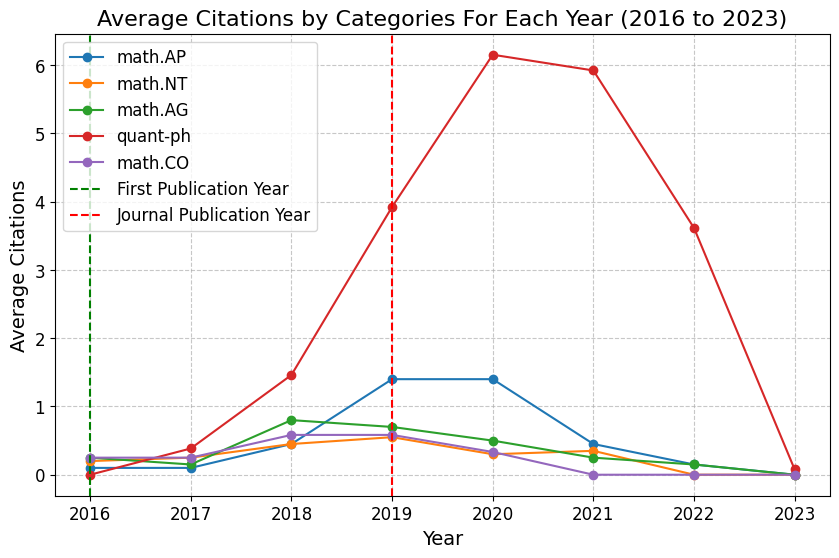

In [ ]:
plot_average_citations(df_copy, 2016, 2019)
plot_average_citations_by_category(df_copy, 2016, 2019)

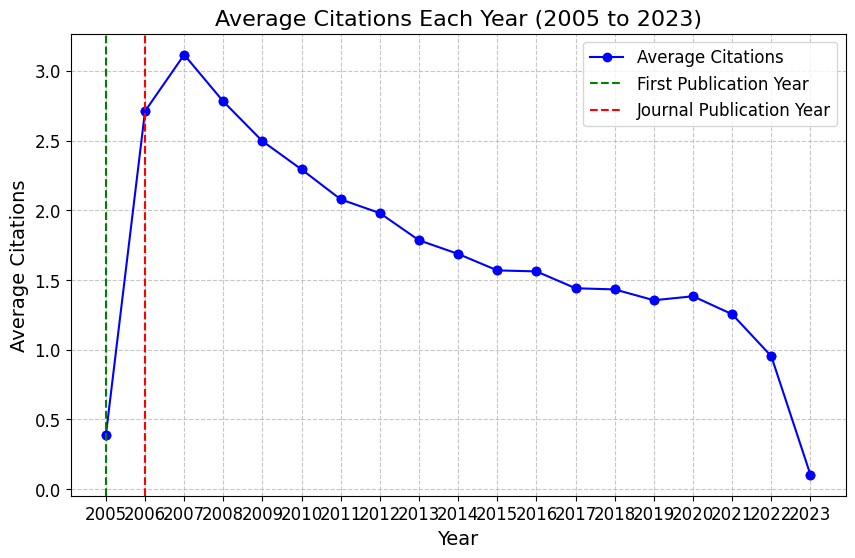

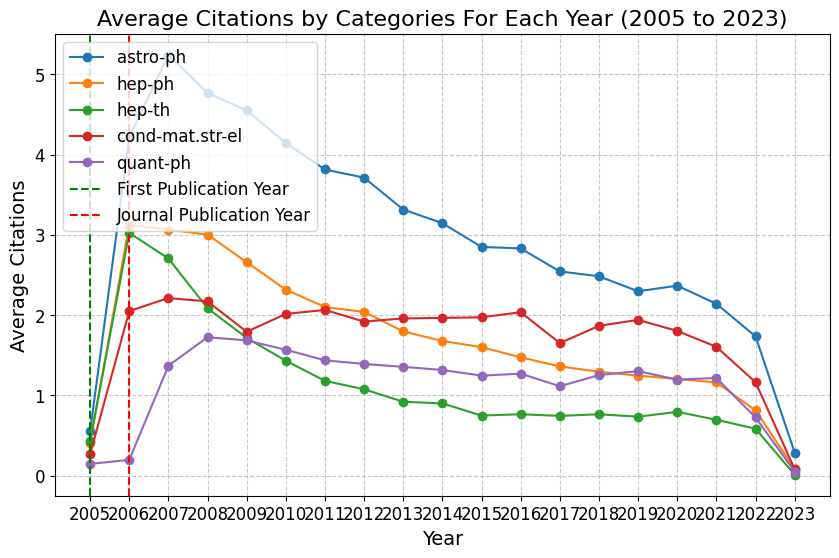

In [ ]:
plot_average_citations(df_copy, 2005, 2006)
plot_average_citations_by_category(df_copy, 2005, 2006)